# Data Wrangling in Python

### Case Study - Analysis of NYC 311 Service Requests

In this analysis, we will look at the 311 Service Requests dataset published by New York City. 

#### What are 311 Service Requests?

311 Service Requests are requests made by residents for city services such as noise complains, or issues with water and utilities. Each request is recorded along with several pieces of associated information such as the type of request and where in the city the request originated.

#### Dataset
The current dataset includes more than 17 million rows of data and contains data from 2010 to the present.

The full dataset is updated daily and can be accessed [on the NYC Open Data Wesbite](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).

#### Analysis

We will look into a small subset of this data: all complaints for the month of April 2018. 

The question we will try to answer with the analysis of the 311 NYC data is as follows:

> What part of the city has the most noise complaints on Sunday?

[comment]: <> (some materials in this notebook are based from Julia Evans https://jvns.ca/blog/2013/12/22/cooking-with-pandas/)

## Part 0 - Importing Libraries

In [1]:
import numpy as np #used for mathematical operations/matrix ops
import pandas as pd #data wrangling, structuring, filtering, aggregating, etc
import matplotlib.pyplot as plt #visualization

## Part 1 - Reading the data
For this demonstration, download the data from the link. 

Once we have read the data, it's a good idea to check the `head`, `shape`, and `info` of the result to make sure all rows and columns have been captured.
- `head` or `tail` will show the first or last few records of your DataFrame
- `shape` will show you the number of rows and columns
- `info` will show you the columns and their respective data types

**Note:** 
- Make sure that the file is in the correct folder or update the path in the read_csv() function to include the correct path to the file. 
- The `pd.read_csv` command has [many options](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) that allow you to control how the file is read. For example, some files will have headers while others won't. Pandas will try to detect these things automatically, but in some cases you may need to play around wiht the options to get it just right.

In [2]:
complaints = pd.read_csv('C_311_Service_Requests_APRIL2018.csv')

C:\Users\hp\anaconda31\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,17,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38837194,04/01/2018 12:00:00 AM,04/10/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Swimming Pool - Unmaintained,1-2 Family Dwelling,10312,45 JEANETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.543132,-74.175614,"(40.54313178878882, -74.17561421997694)"
1,38837043,04/01/2018 12:00:00 AM,03/12/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,11217,399 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687177,-73.984820,"(40.687177293988285, -73.98481975668435)"
2,38836824,04/01/2018 12:00:00 AM,04/09/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11224,2980 WEST 29 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.574249,-73.995169,"(40.57424936932171, -73.99516925322999)"
3,38836823,04/01/2018 12:00:00 AM,03/20/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10025,360 CENTRAL PARK WEST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.791567,-73.964767,"(40.79156678627206, -73.9647670611818)"
4,38836788,04/01/2018 12:00:00 AM,04/04/2018 06:19:08 PM,DOHMH,Department of Health and Mental Hygiene,Unsanitary Animal Pvt Property,Dog,3+ Family Apartment Building,10454,590 EAST 138 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.806377,-73.916446,"(40.806377143967396, -73.91644582317069)"


In [5]:
len(complaints)

199830

In [9]:
len(complaints.columns)

41

In [10]:
complaints.shape

(199830, 41)

In [12]:
complaints.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199830 entries, 0 to 199829
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      199830 non-null  int64  
 1   Created Date                    199830 non-null  object 
 2   Closed Date                     187914 non-null  object 
 3   Agency                          199830 non-null  object 
 4   Agency Name                     199830 non-null  object 
 5   Complaint Type                  199830 non-null  object 
 6   Descriptor                      197616 non-null  object 
 7   Location Type                   157352 non-null  object 
 8   Incident Zip                    192231 non-null  object 
 9   Incident Address                167945 non-null  object 
 10  Street Name                     167938 non-null  object 
 11  Cross Street 1                  115928 non-null  object 
 12  Cross Street 2  

## Part 2 - Investigating the data

Now that we know that all our data has been stored in the DataFrame, lets see what columns we want to use, what data is in there, and figure out if we need to clean up the data at all.

The columns we are interested in are:
1. **Created Date** - to determine which day of the week the complaint was filed
2. **Borough** - to determine which part of the city the complaint originated from
3. **Complaint Type** - to determine the category of complaint

Lets take a look at these columns and see what we find there.
- functions like `unique()` and `value_counts()` are useful to investigate columns with string or date values
- functions like `describe()` are useful to investigate columns with numerical values and check for outliers

In [ ]:
# What part of the city has the most noise complaints on Sunday?

In [14]:
complaints['Complaint Type'].value_counts()[:25]

Noise - Residential                    17665
HEAT/HOT WATER                         14822
Request Large Bulky Item Collection    13817
Illegal Parking                        11875
Blocked Driveway                       10448
Street Condition                       10020
Street Light Condition                  6217
Noise                                   6032
UNSANITARY CONDITION                    5588
Water System                            4407
PAINT/PLASTER                           4178
Noise - Street/Sidewalk                 4110
Noise - Commercial                      3946
PLUMBING                                3553
Sewer                                   3347
Dirty Conditions                        3089
WATER LEAK                              3075
Derelict Vehicle                        3063
Missed Collection (All Materials)       3061
Sanitation Condition                    3010
Traffic Signal Condition                2998
Derelict Vehicles                       2952
Noise - Ve

In [ ]:
#We have lots of NOISE types we can combine

In [15]:
complaints['Borough'].value_counts()

BROOKLYN         61704
QUEENS           49269
MANHATTAN        38327
BRONX            34916
STATEN ISLAND    11737
Unspecified       3877
Name: Borough, dtype: int64

Some key observations include:
1. There appear to be many different complaint types related to noise like 'Noise - Residential', 'Noise', etc.
    - We will have to group these complaints to get an accurate picture of the overall number of noise complaints
2. There are some complaints that were logged to an 'Unspecified' borough, but the total number of records is low (~4,000 out of total ~200,000)
    - Since we will be grouping our data based on borough we can keep these records
3. The data type of the 'Created Date' is currently a string object, which should be converted to a datetime object to allow us to easily filter on any day of the week, month, etc.

Based on our observations, the cleanup we can do on these columns includes:
1. Redefine 'Created Date' data type for filtering on days of the week (we want the most popular complaint on Sunday).
2. Add a new column *'is_noise'* based on *'Complaint Type'* to capture similar noise-related complaints.

## Part 3 - Cleaning the data

#### 1. Redefine 'Created Date' data type for filtering on days of the week (we want the most popular complaint on Sunday)
- By default, pandas read the 'Created Date' column as a string, so we will tell it that this is a date using the `to_datetime` method.
- We can double-check to make sure it worked by using the `info()` to check for the column's data type

In [17]:
complaints['Created Date'] = pd.to_datetime(complaints['Created Date'])

In [18]:
complaints.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199830 entries, 0 to 199829
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      199830 non-null  int64         
 1   Created Date                    199830 non-null  datetime64[ns]
 2   Closed Date                     187914 non-null  object        
 3   Agency                          199830 non-null  object        
 4   Agency Name                     199830 non-null  object        
 5   Complaint Type                  199830 non-null  object        
 6   Descriptor                      197616 non-null  object        
 7   Location Type                   157352 non-null  object        
 8   Incident Zip                    192231 non-null  object        
 9   Incident Address                167945 non-null  object        
 10  Street Name                     167938 non-null  object 

#### 2. Add a new column *'is_noise'* based on *'Complaint Type'* to capture similar noise-related complaints like 'Noise' and 'Noise - Residential'
- Just by looking at the top 10 complaint types using `value_counts`, we notice the data contains redundancy like 'Noise' and 'Noise - Residential', which is surprisingly common. 
- Grouping the data before cleaning it up will skew our results, so we need to clean it up first.
- We will clean this up by identifying all complaints where the type contains the word 'noise' using the `str.contains` method, and creating a new column to indicate whether the complaint is noise-related *'is_noise'*

In [20]:
complaints['is_noise'] = complaints['Complaint Type'].str.contains('Noise')

In [21]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,is_noise
0,38837194,2018-04-01,04/10/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Swimming Pool - Unmaintained,1-2 Family Dwelling,10312,45 JEANETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.543132,-74.175614,"(40.54313178878882, -74.17561421997694)",False
1,38837043,2018-04-01,03/12/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,11217,399 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.687177,-73.984820,"(40.687177293988285, -73.98481975668435)",False
2,38836824,2018-04-01,04/09/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11224,2980 WEST 29 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.574249,-73.995169,"(40.57424936932171, -73.99516925322999)",False
3,38836823,2018-04-01,03/20/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10025,360 CENTRAL PARK WEST,...,NaN,NaN,NaN,NaN,NaN,NaN,40.791567,-73.964767,"(40.79156678627206, -73.9647670611818)",False
4,38836788,2018-04-01,04/04/2018 06:19:08 PM,DOHMH,Department of Health and Mental Hygiene,Unsanitary Animal Pvt Property,Dog,3+ Family Apartment Building,10454,590 EAST 138 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.806377,-73.916446,"(40.806377143967396, -73.91644582317069)",False


## Part 4 - Answering the question
Remember, our question is as follows:
> What part of the city has the most noise complaints on Sunday?

Now that our data is clean, all we have to do is:
1. Filter on the noise complaints using our new column 'is_noise'
2. Filter on the days of the week using the 'Created Date' column, which is super easy now that it's defined as a date
    - `dt.dayofweek` returns a different number for each day of the week. Sunday is number 6 as per the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek).
3. Group the data by neighbourhood using the 'Borough' column, and sort to show the neighbourhoods at the top of the list.

> Once we do this, it becomes clear that Manhattan has the most noise complaints on Sundays, followed closely by Brooklyn.

In [26]:
complaints[(complaints['is_noise'] == True) & (complaints['Created Date'].dt.dayofweek == 6)] \
    .groupby('Borough').count()['Complaint Type'] \
    .sort_values(ascending = False)

Borough
MANHATTAN        2320
BROOKLYN         2121
BRONX            1679
QUEENS           1482
STATEN ISLAND     182
Unspecified        52
Name: Complaint Type, dtype: int64

Text(0, 0.5, 'Number of Complaints')

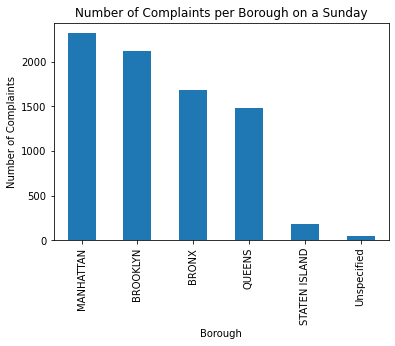

In [27]:
complaints[(complaints['is_noise'] == True) & (complaints['Created Date'].dt.dayofweek == 6)] \
    .groupby('Borough').count()['Complaint Type'] \
    .sort_values(ascending = False).plot(kind = 'bar')
plt.title('Number of Complaints per Borough on a Sunday')
plt.ylabel('Number of Complaints')

## Part 5 - Making clean data available to others
Now that we have cleaned our data, and added a new column, we can write it out to a file for future analysis.

In [28]:
complaints.to_csv('C_O3_Data_Wrangling_results.csv')